In [19]:
import pandas as pd
import matplotlib.pyplot as plt

In [5]:
df = pd.read_csv('churn.csv')

In [6]:
df

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


# Analyze data for potential anomalies

In [13]:
unique_genders = df['Gender'].unique()
unique_genders


array(['Female', 'Male'], dtype=object)

In [14]:

unique_places = df['Geography'].unique()
unique_places

array(['France', 'Spain', 'Germany'], dtype=object)

In [33]:
unique_states = df['HasCrCard'].unique()
unique_states

array([1, 0], dtype=int64)

In [34]:
unique_member = df['IsActiveMember'].unique()
unique_member

array([1, 0], dtype=int64)

In [35]:
unique_exited = df['Exited'].unique()
unique_exited

array([1, 0], dtype=int64)

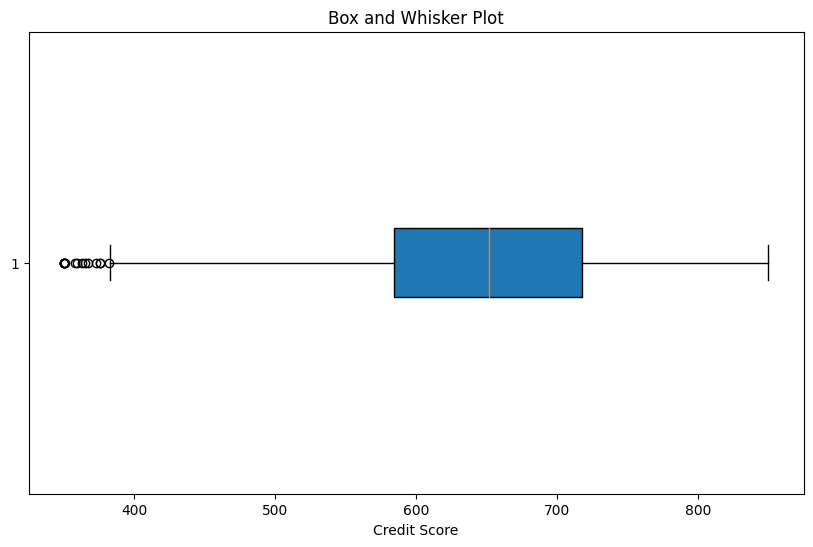

Q1 (25th percentile): 584.0
Q2 (Median or 50th percentile): 652.0
Q3 (75th percentile): 718.0
IQR (Interquartile Range): 134.0
Minimum Credit Score: 350
Maximum Credit Score: 850
Outliers:
      RowNumber  CustomerId    Surname  CreditScore Geography  Gender  Age
7             8    15656148     Obinna          376   Germany  Female   29
942         943    15804586        Lin          376    France  Female   46
1193       1194    15779947     Thomas          363     Spain  Female   28
1405       1406    15612494  Panicucci          359    France  Female   44
1631       1632    15685372   Azubuike          350     Spain    Male   54
1838       1839    15758813   Campbell          350   Germany    Male   39
1962       1963    15692416  Aikenhead          358     Spain  Female   52
2473       2474    15679249       Chou          351   Germany  Female   57
2579       2580    15597896   Ozoemena          365   Germany    Male   30
8154       8155    15791533     Ch'ien          367     Spain

In [32]:
credit_score = df['CreditScore']

# Plot a box and whisker chart
plt.figure(figsize=(10,6))
plt.boxplot(credit_score, vert=False, patch_artist=True)
plt.title('Box and Whisker Plot')
plt.xlabel('Credit Score')
plt.show()

# Calculate Q1, Q2 (median), Q3, and IQR
Q1 = credit_score.quantile(0.25)
Q2 = credit_score.median()
Q3 = credit_score.quantile(0.75)
IQR = Q3 - Q1

print(f"Q1 (25th percentile): {Q1}")
print(f"Q2 (Median or 50th percentile): {Q2}")
print(f"Q3 (75th percentile): {Q3}")
print(f"IQR (Interquartile Range): {IQR}")

print("Minimum Credit Score:", df['CreditScore'].min())
print("Maximum Credit Score:", df['CreditScore'].max())

# Define the outlier boundaries
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Find outliers
outliers = df[(df['CreditScore'] < lower_bound) | (df['CreditScore'] > upper_bound)]

# Display the outliers along with their corresponding CustomerId
print("Outliers:")
print(outliers.loc[:, :'Age'])
